In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train,y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

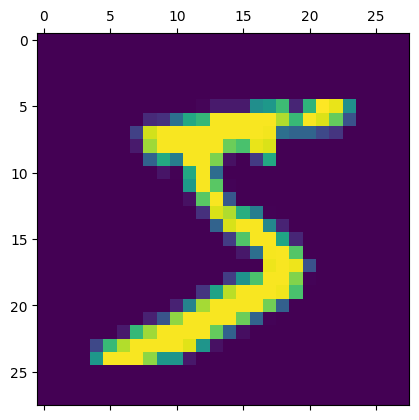

In [8]:
plt.matshow(X_train[0])

In [9]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [13]:
X_train.shape

(60000, 28, 28)

In [15]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_train_flattened.shape

(60000, 784)

In [20]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation = 'sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7670 - loss: 17.8456
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8782 - loss: 6.1580
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8846 - loss: 5.6089
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8872 - loss: 5.3453
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - accuracy: 0.8883 - loss: 5.3471


In [22]:
scaled_X_train_flattened=X_train_flattened/255
scaled_X_test_flattened= X_test_flattened/255


No hidden layers

In [23]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation = 'sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(scaled_X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8180 - loss: 0.7230
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9151 - loss: 0.3084
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9225 - loss: 0.2786
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9249 - loss: 0.2708
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9267 - loss: 0.2656


In [24]:
model.evaluate(scaled_X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9165 - loss: 0.2991


[0.2644559442996979, 0.9272000193595886]

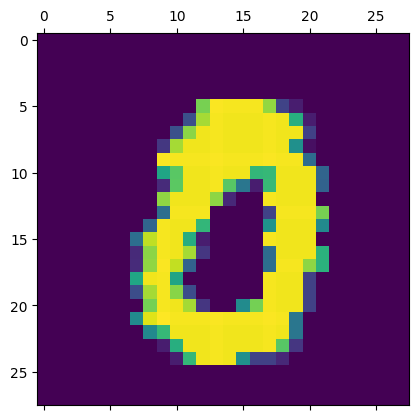

In [25]:
plt.matshow(X_train[69])

In [26]:
y_predicted = model.predict(scaled_X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [27]:
y_predicted[69]

array([9.9980754e-01, 1.0625686e-09, 2.9905039e-01, 2.9475766e-03,
       2.8228047e-08, 9.5175833e-01, 3.4232759e-01, 1.4310757e-03,
       2.8251335e-02, 1.5998812e-05], dtype=float32)

In [28]:
np.argmax(y_predicted[69])

0

In [29]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [30]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [32]:
cm = tf.math.confusion_matrix(labels = y_test,predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    2,    2,    0,    5,   10,    2,    2,    1],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   3,   10,  929,   13,    8,    5,   13,   10,   36,    5],
       [   1,    0,   21,  919,    0,   27,    2,   10,   23,    7],
       [   1,    2,    4,    2,  911,    0,   13,    4,    9,   36],
       [   7,    2,    2,   26,    8,  786,   19,    8,   28,    6],
       [   7,    3,    7,    1,    7,   11,  919,    2,    1,    0],
       [   1,    6,   21,    7,    6,    0,    0,  951,    2,   34],
       [   5,    8,    8,   20,    9,   29,    9,   12,  868,    6],
       [  10,    7,    1,    9,   24,    7,    0,   27,    7,  917]])>

1 hidden layer


In [44]:
model1 = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])
model1.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model1.fit(scaled_X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8721 - loss: 0.4568
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9620 - loss: 0.1286
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9740 - loss: 0.0841
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9811 - loss: 0.0623
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9852 - loss: 0.0473


Text(95.72222222222221, 0.5, 'Truth')

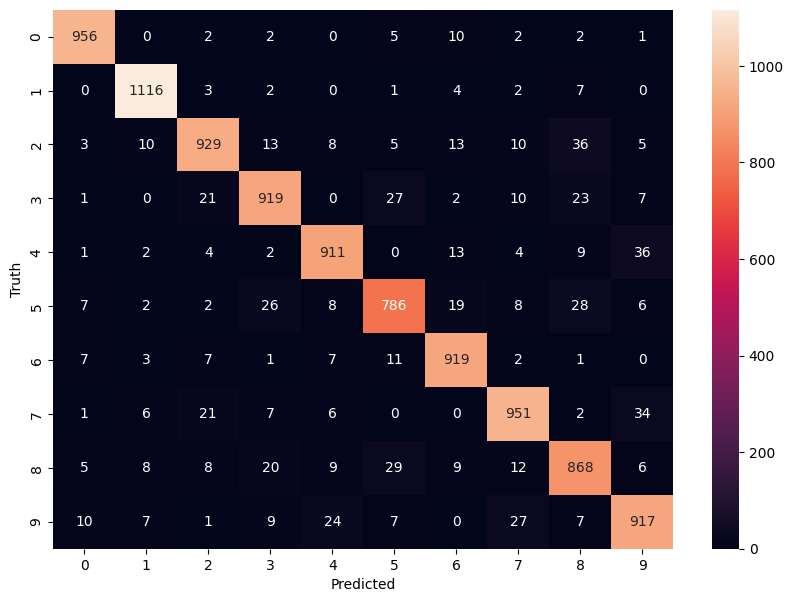

In [35]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [43]:
model1.evaluate(scaled_X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9713 - loss: 0.0965


[0.07976661622524261, 0.9746999740600586]

Without flattening array manually

In [49]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])
model2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model2.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8034 - loss: 6.6022
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8934 - loss: 0.4192
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9227 - loss: 0.2997
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9313 - loss: 0.2581
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9368 - loss: 0.2470
